## Modelo de Árvore de Decisão

Nesse arquivo vamos trabalhar o modelo de árvore de decisão, se baseando nos dados vistos na pasta 'data'

---

### Importando bibliotecas

In [38]:
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

### Criando dataset

In [3]:
df = pd.read_csv("./data/heart_attack_prediction_dataset.csv", sep=',')
df = df.drop(columns=['Continent', 'Hemisphere'])
df = pd.get_dummies(df, columns=['Patient ID', 'Blood Pressure', 'Diet', 'Country'], drop_first=True)
df.head

<bound method NDFrame.head of       Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0      67    1          208          72         0               0        1   
1      21    1          389          98         1               1        1   
2      21    0          324          72         1               0        0   
3      84    1          383          73         1               1        1   
4      66    1          318          93         1               1        1   
...   ...  ...          ...         ...       ...             ...      ...   
8758   60    1          121          61         1               1        1   
8759   28    0          120          73         1               0        0   
8760   47    1          250         105         0               1        1   
8761   36    1          178          60         1               0        1   
8762   25    0          356          75         1               1        0   

      Obesity  Alcohol Consumptio

### Preparando dados para o modelo

In [4]:
x = df.drop(columns=['Heart Attack Risk'])
y = df['Heart Attack Risk']

x.head
y.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
8758    0
8759    0
8760    1
8761    0
8762    1
Name: Heart Attack Risk, Length: 8763, dtype: int64>

### Separação dos grupos de teste e treino 
A fatia separada para o treino do modelo equivale a 25% da base de dados

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### Criação e execução do modelo de árvore de decisão

In [40]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

### Analise dos resultados

##### Matriz de confusão

In [41]:
print('\n Matriz de confusão\n', pd.crosstab(y_test, predictions, rownames=['Real'], colnames=['Predito'], margins = True, margins_name="Todos"))



 Matriz de confusão
 Predito     0    1  Todos
Real                     
0         924  481   1405
1         514  272    786
Todos    1438  753   2191


##### Métricas

In [42]:
accur = metrics.accuracy_score(y_test, predictions)
print(f"Acurácia: {accur:.4f}")
precisao = metrics.precision_score(y_test, predictions)
print(f'Precisão: {precisao:.4f}')
revocacao = metrics.recall_score(y_test, predictions)
print(f'Revocação: {revocacao:.4f}')
f1 = metrics.f1_score(y_test, predictions)
print(f'F1-Score: {f1:.4f}')

Acurácia: 0.5459
Precisão: 0.3612
Revocação: 0.3461
F1-Score: 0.3535


##### Aplicando a curva ROC ao resultados

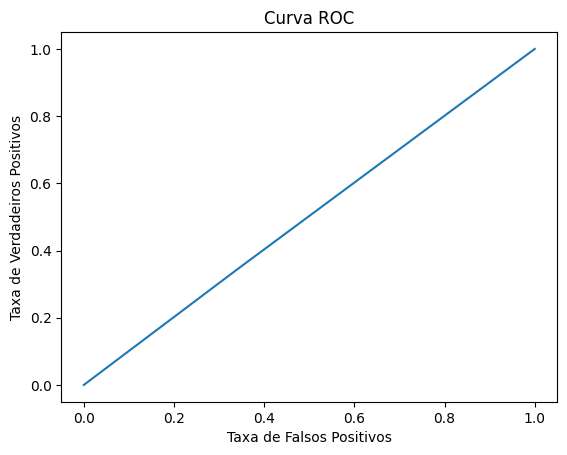

Área sob a Curva ROC (ROC AUC): 0.5018536125976837


In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)

plt.plot(fpr, tpr)
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.show()

roc_auc = metrics.roc_auc_score(y_test, predictions)
print(f'Área sob a Curva ROC (ROC AUC): {roc_auc}')